In [1]:
import cv2
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

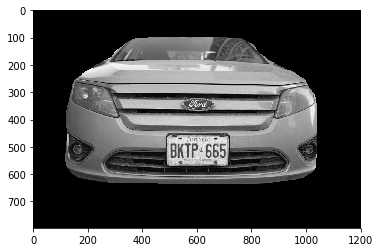

In [2]:
ORI_IMG_PATH = "ori/car8.jpg"
IMG_PATH = "t2/masked_car10.png"
ori_img = cv2.imread(ORI_IMG_PATH)
img = cv2.imread(IMG_PATH)
ori_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")
plt.savefig('gary.png', dpi=300)

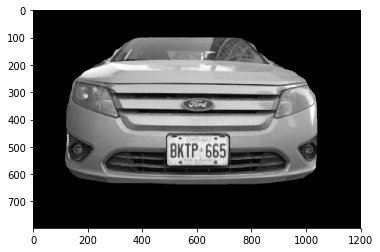

In [3]:
blur_img = cv2.GaussianBlur(gray_img, (5, 5), 1, 1, cv2.BORDER_DEFAULT)
blur_img = cv2.medianBlur(blur_img, 5)
plt.imshow(blur_img, cmap="gray")
plt.savefig('blur.png', dpi=300)

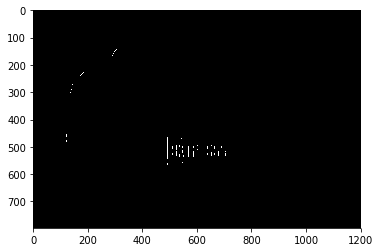

In [4]:
d_x = cv2.Sobel(blur_img, cv2.CV_8U, 1, 0, ksize = 3)
ret, binary = cv2.threshold(d_x, 240, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap="gray")
plt.savefig('sobel.png', dpi=300)

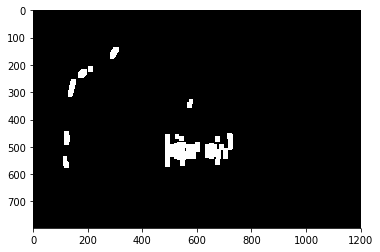

In [5]:
element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
element2 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 7))
dilation = cv2.dilate(binary, element2, iterations = 1)
erosion = cv2.erode(dilation, element1, iterations = 1)
dilation2 = cv2.dilate(erosion, element2,iterations = 2)
plt.imshow(dilation2, cmap="gray")
plt.savefig('dilation.png', dpi=300)

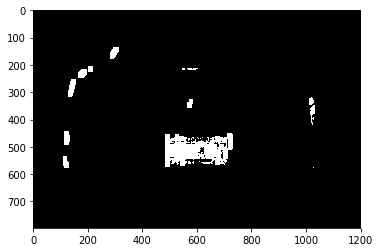

In [6]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
white_up = np.array([255, 20, 255])
white_low = np.array([0, 0, 200])
mask = cv2.inRange(hsv, white_low, white_up)
res = cv2.bitwise_or(mask, dilation2)
plt.imshow(res, cmap="gray")
plt.savefig('or.png', dpi=300)

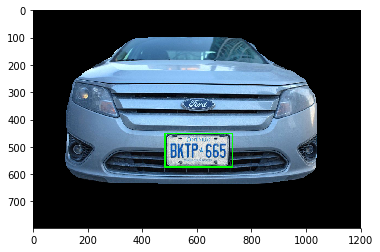

In [9]:
ori_img2 = cv2.imread(IMG_PATH)
ori_img2 = cv2.cvtColor(ori_img2, cv2.COLOR_BGR2RGB)
image, contours, hierarchy = cv2.findContours(res, cv2.RETR_LIST,
                cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cnt = contours[max_index]

x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(ori_img2, (x,y), (x+w,y+h), (0,255,0), 3)
skimage.io.imsave("boximg.png", ori_img2)
plt.imshow(ori_img2)

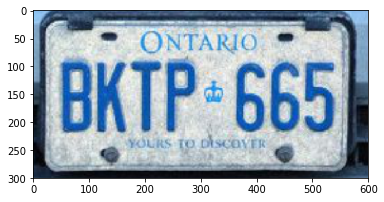

In [11]:
ori_img1 = cv2.imread(IMG_PATH)
ori_img1 = cv2.cvtColor(ori_img1, cv2.COLOR_BGR2RGB)
src_pts = np.array([(x,y), (x+w,y), (x+w,y+h), (x,y+h)])
dst_pts = np.array([(0, 0), (600, 0), (600, 300), (0, 300)])
matrix, _ = cv2.findHomography(src_pts, dst_pts)
dst_img = cv2.warpPerspective(ori_img1, matrix, (600, 300))
skimage.io.imsave("homo_plate.png", dst_img)
plt.imshow(dst_img)